# Solutions
1. [Intro to Machine Learning][1]
2. [Inspecting the Estimator][2]
3. [Building a baseline model][3]

[1]: #1.-Intro-to-Machine-Learning
[2]: #2.-Inspecting-the-Estimator
[3]: #3.-Building-a-baseline-model

# 1. Intro to Machine Learning

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart = pd.read_csv('../data/heart.csv')
heart = heart.fillna({'ca': 0, 'thal': 'normal'})
heart.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,max_hr,exang,old_peak,slope,ca,thal,disease
0,63,Male,typical,145,233,1,left ventricular hypertrophy,150,0,2.3,3,0.0,fixed,0
1,67,Male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,2,3.0,normal,1
2,67,Male,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,2,2.0,reversable,1
3,37,Male,nonanginal,130,250,0,normal,187,0,3.5,3,0.0,normal,0
4,41,Female,nontypical,130,204,0,left ventricular hypertrophy,172,0,1.4,1,0.0,normal,0


### Problem 1
<span  style="color:green; font-size:16px">Select a different variable besides `max_hr` and repeat the three step process to train a single-feature logistic regression model. Keep trying other numeric columns. Can you beat 67% accuracy?</span>

In [17]:
# try chol
X = heart['chol'].values
y = heart['disease'].values

X = X.reshape(-1, 1)

In [18]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [19]:
logr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
logr.score(X, y)

0.5445544554455446

Column `chol` is worse. Let's try `old_peak` and write a function to automate the procss

In [21]:
def get_logr_accuracy(col):
    X = heart[col].values
    y = heart['disease'].values
    X = X.reshape(-1, 1)
    logr.fit(X, y)
    return logr.score(X, y)

In [22]:
get_logr_accuracy('chol')

0.5445544554455446

In [23]:
# old_peak is higher!
get_logr_accuracy('old_peak')

0.6831683168316832

In [24]:
get_logr_accuracy('rest_bp')

0.5676567656765676

In [25]:
get_logr_accuracy('age')

0.6039603960396039

# 2. Inspecting the Estimator

### Problem 1
<span  style="color:green; font-size:16px">Use the docstrings to help you complete the following function. Test your function with different inputs.</span>

In [11]:
def log_reg_learn_plot(df, columns, target):
    """
    This function produces a single plot of the actual values of the target 
    variable along with the estimated probability curve from the logistic 
    regression model. It will be able to produce the plot above in this workbook, 
    but for several columns.
        
    Parameters
    ----------
    df: A Pandas DataFrame ready for machine learning
    
    columns: A list of string names of columns to use to 
        train the model.
        
    target: a single string of the target variable column name
    
    How to implement
    ----------------
    For every column in the `columns` list:
        * Train a logistic regression model with that column as the only feature
        * Use the `target` string column name as the target variable
        * Use np.linspace to create an array of 100 inputs from min to max of that column
        * Calculate a probability of being in each class for each input
        * Make a scatterplot of the values of the column vs the true value of the output (0 or 1)
        * Make a line plot of the inputs vs the calculated probability
        * Make sure you are using a new Axes for every column
        * Use a single Figure if you can
    """
    from sklearn.linear_model import LogisticRegression
    logr = LogisticRegression()
    
    y = df[target].values
    n = len(columns)
    fig, ax_array = plt.subplots(n, 1, figsize=(6, 4 * n))
    if n == 1:
        ax_array = [ax_array]
    for column, ax in zip(columns, ax_array):
        X = df[column].values.reshape(-1, 1)
        logr.fit(X, y)
        inputs = np.linspace(X.min(), X.max(), num=100).reshape(-1, 1)
        probs = logr.predict_proba(inputs)[:, 1]
        ax.scatter(X, y)
        ax.plot(inputs, probs)
        ax.set_xlabel(column)

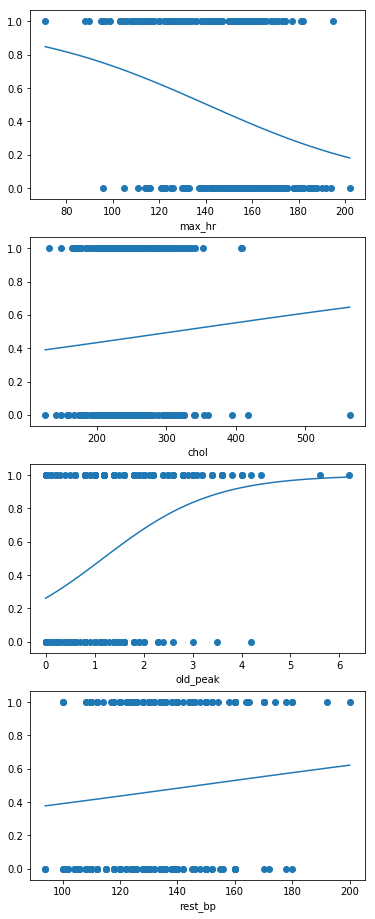

In [14]:
log_reg_learn_plot(heart, ['max_hr', 'chol', 'old_peak', 'rest_bp'], 'disease')

# 3. Building a baseline model

In [18]:
heart = pd.read_csv('../data/heart.csv')
heart = heart.fillna({'ca': 0, 'thal': 'normal'})

from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='most_frequent')

### Problem 1
<span  style="color:green; font-size:16px">Verify that the prediction will be the same regardless of which predictor variable is used for the dummy classifier.</span>

In [22]:
X = heart['old_peak'].values.reshape(-1, 1)
X = X.reshape(-1, 1)
y = heart['disease'].values

dc.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [23]:
dc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
X = heart['chol'].values.reshape(-1, 1)
dc.fit(X, y)
dc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Problem 2
<span  style="color:green; font-size:16px">What do you think the `predict_proba` method will return? Make a guess and then run the command.</span>

In [26]:
dc.predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.